# **e-Commerce Customers - Multiple Linear Regression**

# Importing Libraries

In [2]:
# Filtering Warnings
import warnings
warnings.filterwarnings('ignore')

# Needed Packages
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from patsy import dmatrices
from statsmodels.tools.tools import add_constant


%config InlineBackend.figure_format = 'retina'
sns.set()

# Importing Dataset

In [3]:
url = "https://raw.githubusercontent.com/arya289/eCommerce/main/Ecommerce_Costumers.csv"
df = pd.read_csv(url)
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


# Inspecting Dataset

## Data Definition


- `Email` : e-mail address of e-commerce customers
- `Address` : Physical address of e-commerce customers
- `Avatar` : Chosen avatar by the e-commerce customers
- `Avg. Session Length` : Average time spend by customers on website/application
- `Time on App` : Time spend on the Application by a customer
- `Time on Website` : Time spend on the Website by a customer
- `Length of Membership` : Duration of membership 
- `Yearly Amount Spent` : Yearly e-commerce customer's spent, as the Target Variable

## Feature Selection (Business Wise)

Since we are going to conduct multiple linear regression, we will only need features/variables that relevant. `Email`, `Address` and `Avatar` will be removed, because those variables irrelevant with the analysis.

In [4]:
df=df.drop(columns=['Email', "Address", "Avatar"])

## First and Last Rows

In [5]:
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [6]:
df.tail()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510
499,33.715981,12.418808,35.771016,2.735160,497.778642


## Data Dimension

In total, there are 500 rows and 5 columns from the dataset that are going to be observed.

In [7]:
df.shape

(500, 5)

## Data Type & Null Values

In [8]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [9]:
df.isna().sum()

Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

All of the selected variables are numerical (float64). Notice that there is no null values in this dataset, so we will not need to replacing missing values.

## Describe Numerical Variables

In [10]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


- All variables seems following normal distribution, since the mean of every variable is closely with their median (50%).
- The customer seem spending their time much more in the website than in the app. 
- The `Average Session Length` seems has a similar duration with the `Time on Website`, this may indicate most of the customers are using website instead of app.
- The `Length of Membership` has a quite large range, between 3 months until almost 7 years.
- The average of `Yearly Amount Spent` is around 499.3, almost perfectly similar with it's median which around 498.9.

# Correlation Analysis

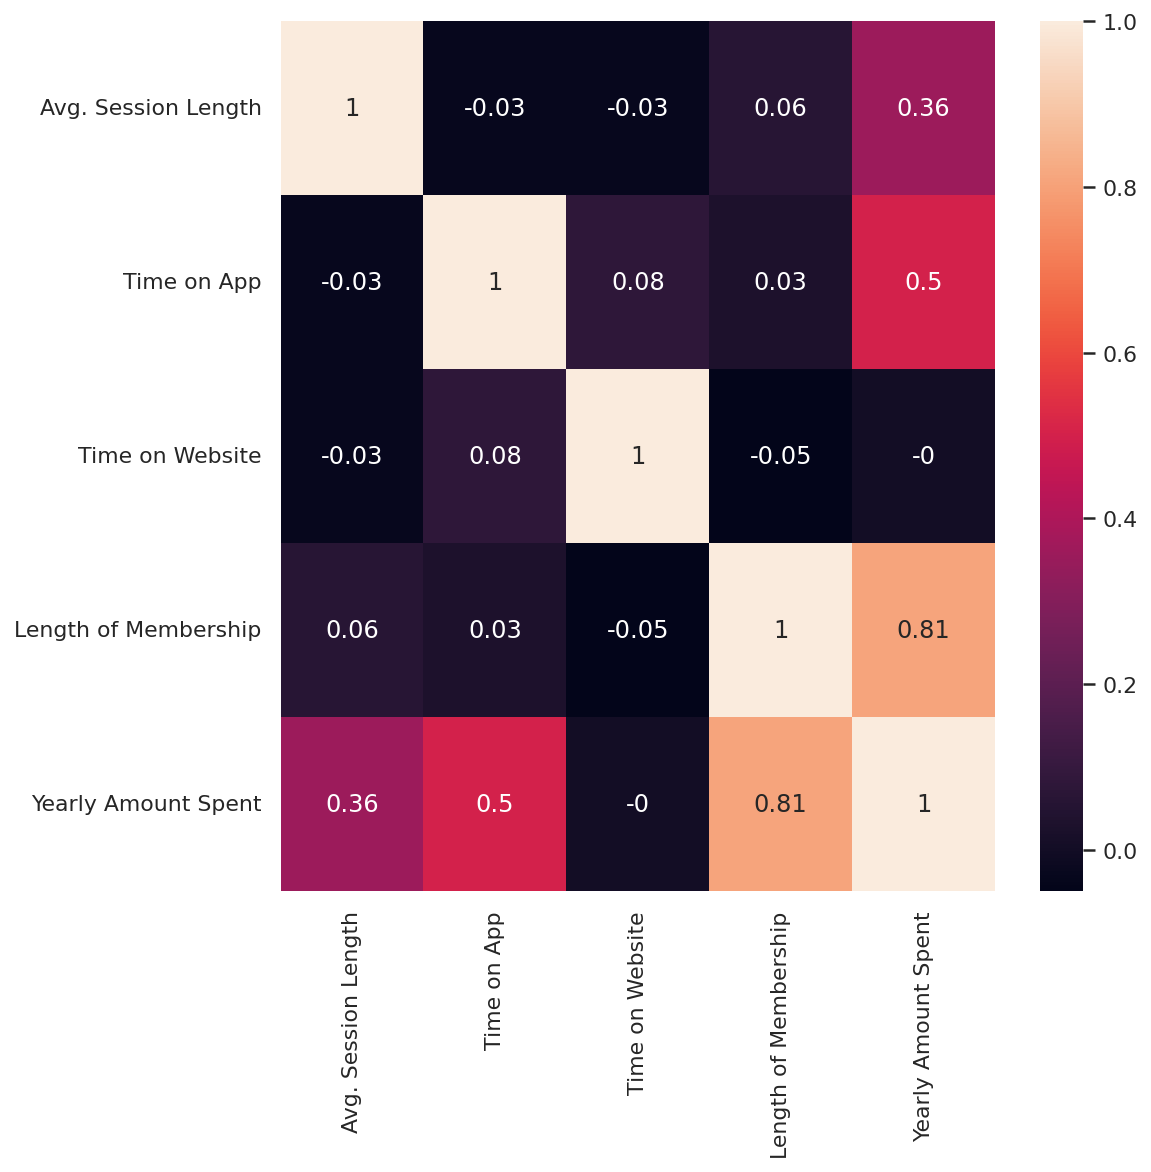

In [11]:
sns.set(rc={'figure.figsize':(8,8)})
matrix = df.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

- The target variable, `Yearly Amount Spent`, has strong correlation with `Length of Membership` (0.81), and weak correlation with `Time on App` (0.50) and `Avg Session Length` (0.36), and have no correlation with `Time on Website`.
- The correlation among prerdictor variables is very weak, this may indicates that we will have no problem with multicollinearity issues.

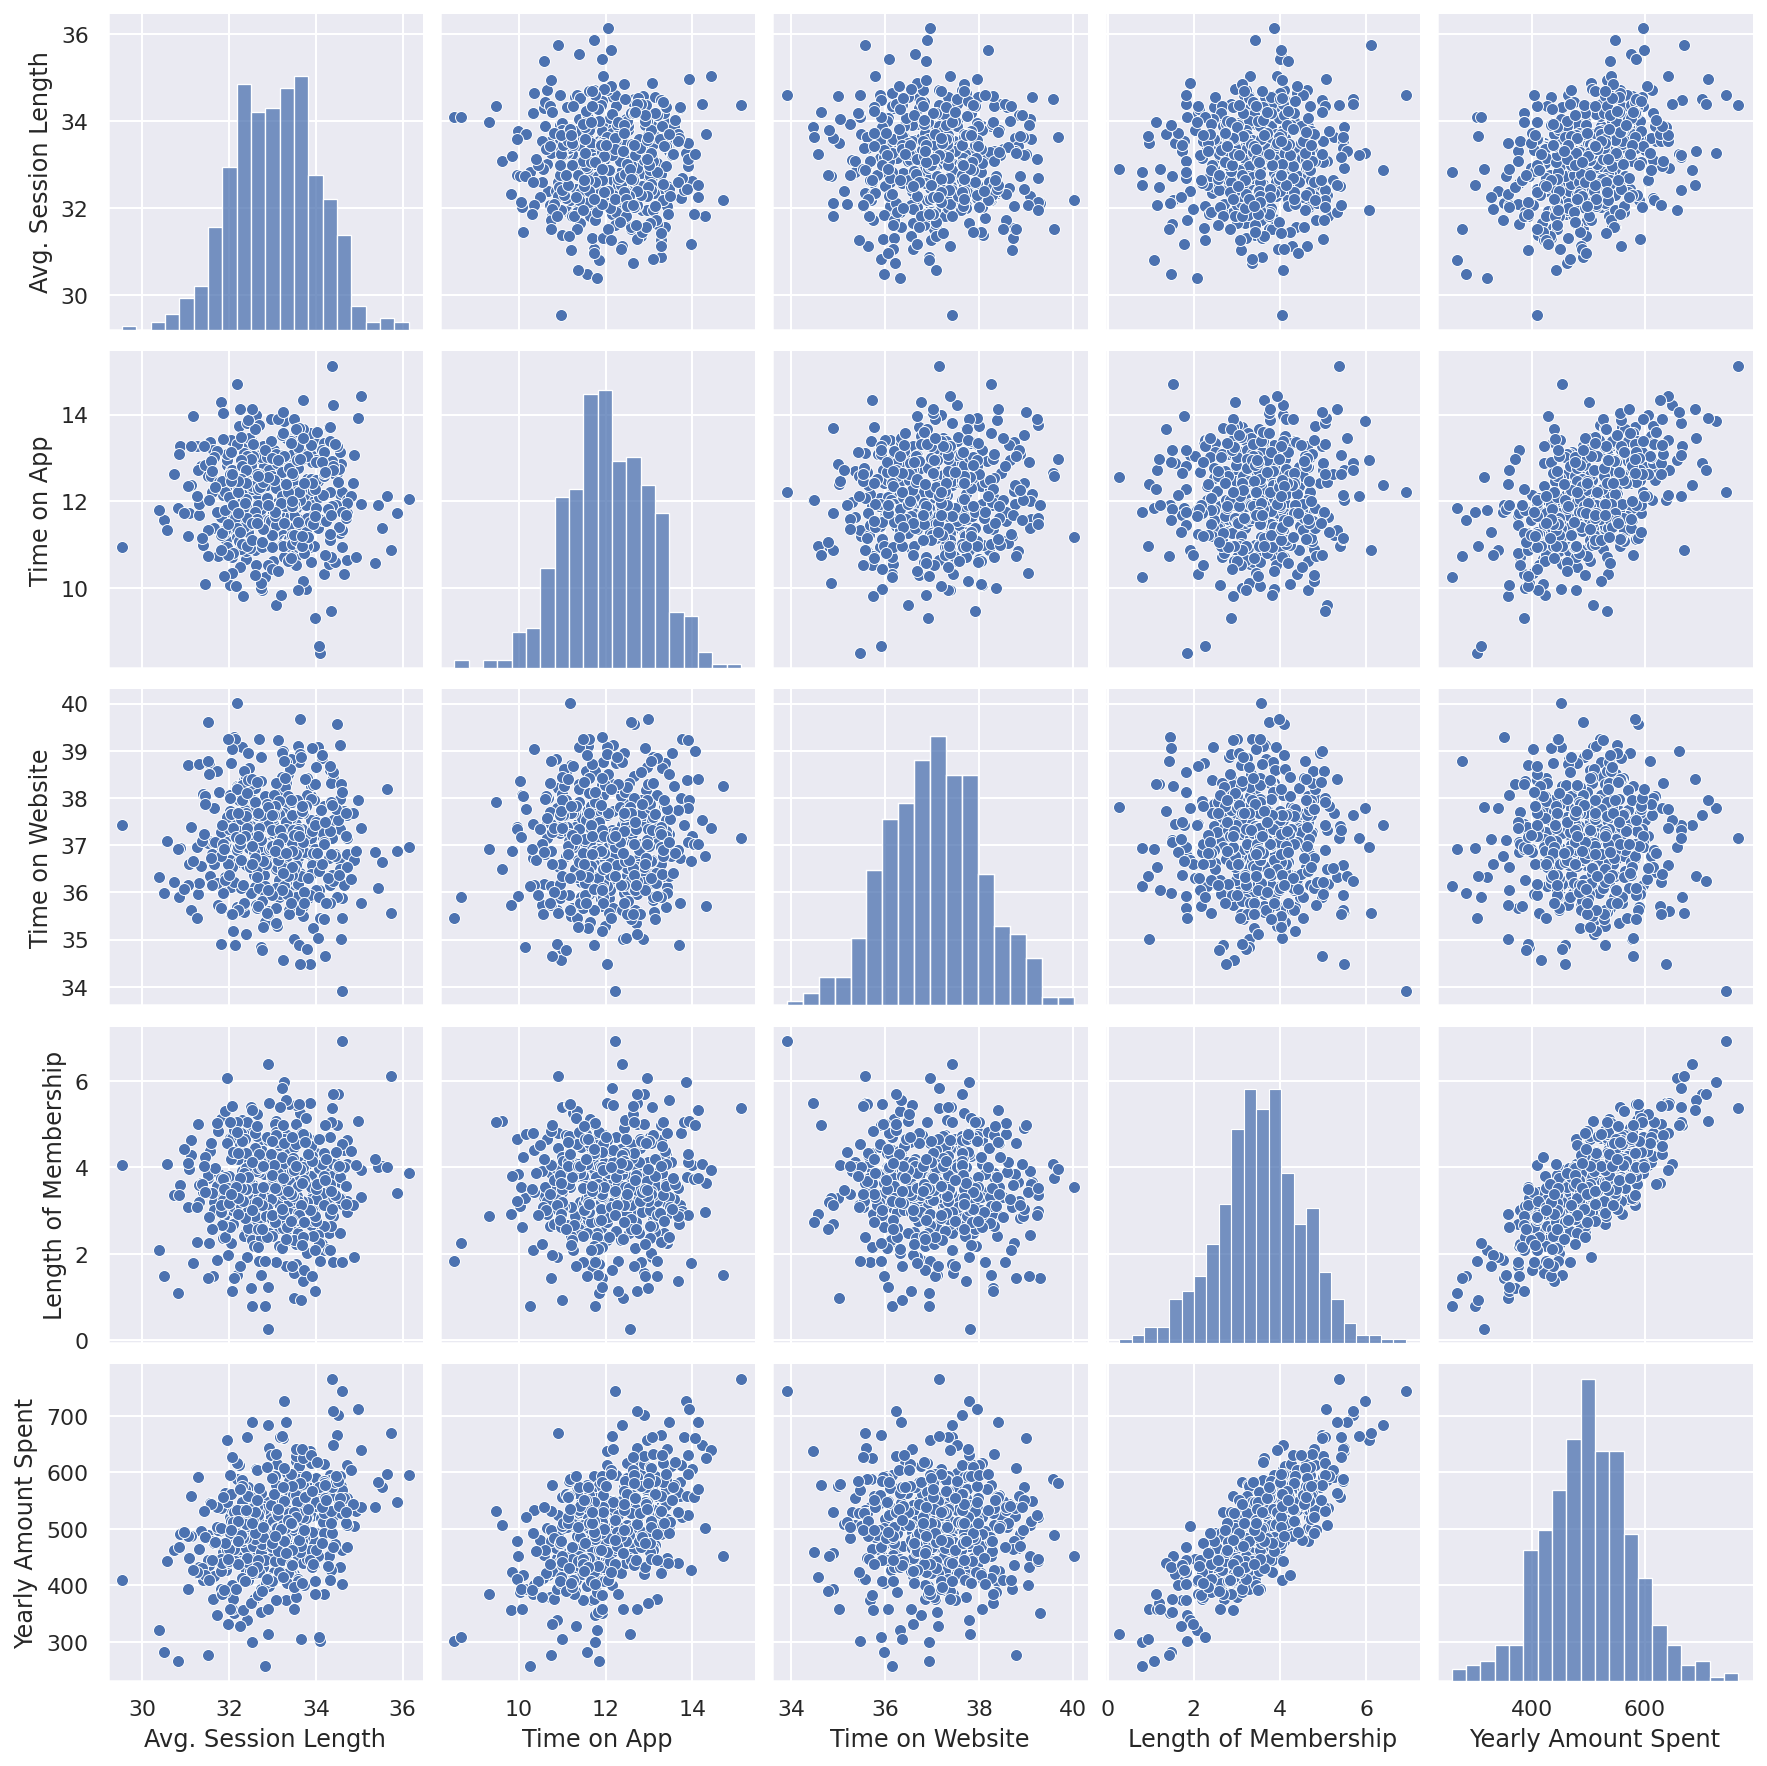

In [12]:
sns.pairplot(data=df)
plt.show()

- As expected from the describe function earlier, we can see celarly that all of the variables are following normal distribution.
- Strong correlation is cleary seen between `Length of Membership` and `Yearly Amount Spent`. As for the other variables, no strong correlation detected. 

# Checking Outliers

## Yearly Amount Spent

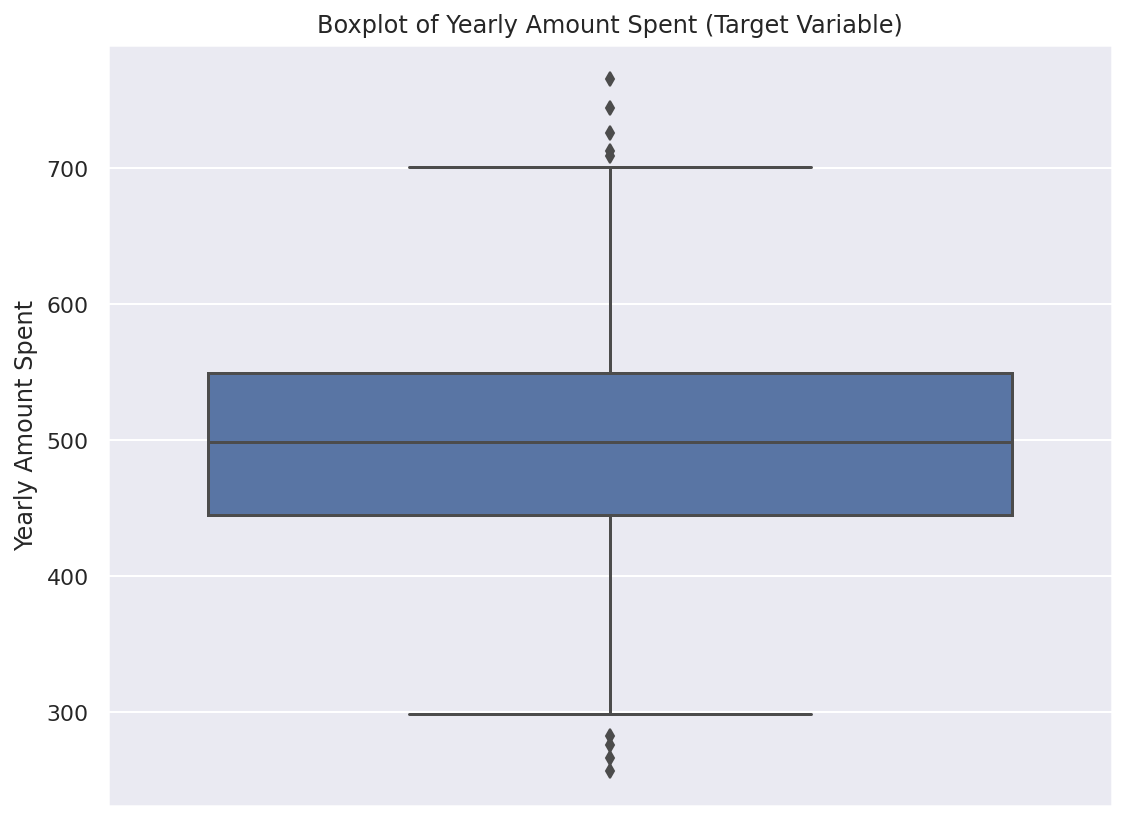

In [13]:
sns.set(rc={'figure.figsize':(9,7)})
sns.boxplot(y='Yearly Amount Spent', data=df).set(title='Boxplot of Yearly Amount Spent (Target Variable)');

## Avg. Session Length

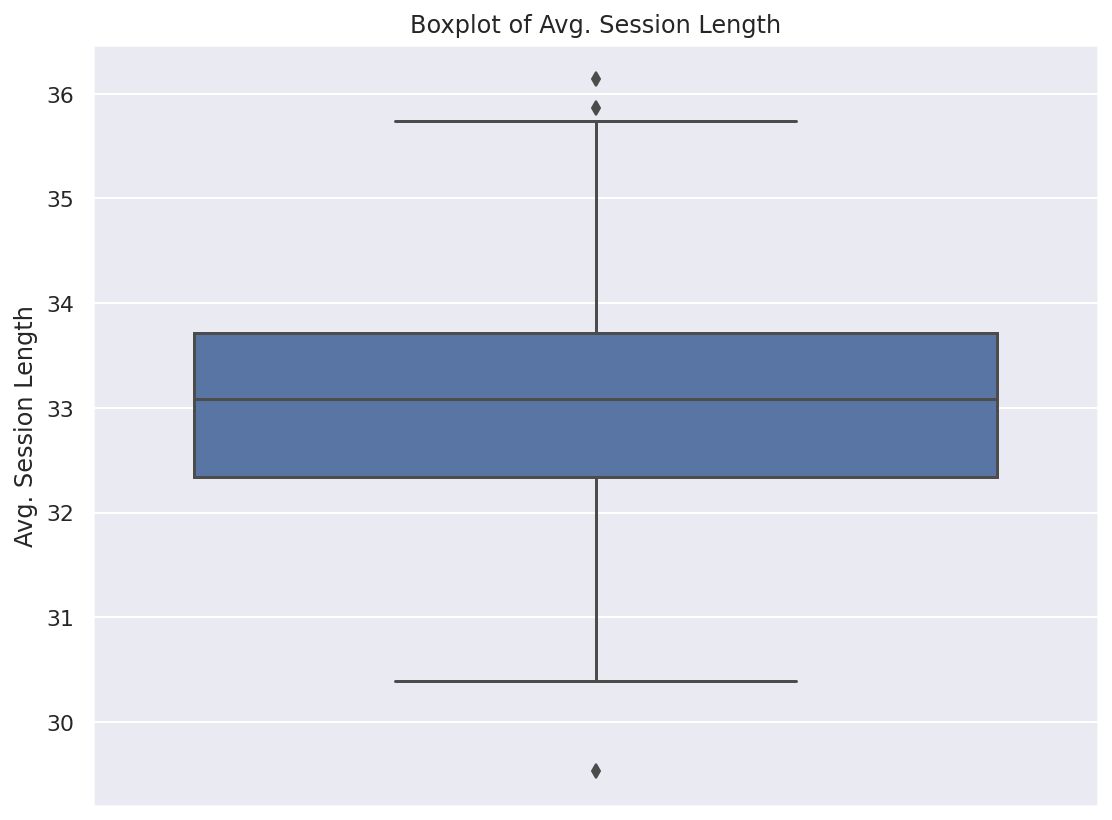

In [14]:
sns.set(rc={'figure.figsize':(9,7)})
sns.boxplot(y='Avg. Session Length', data=df).set(title='Boxplot of Avg. Session Length');

## Time on App

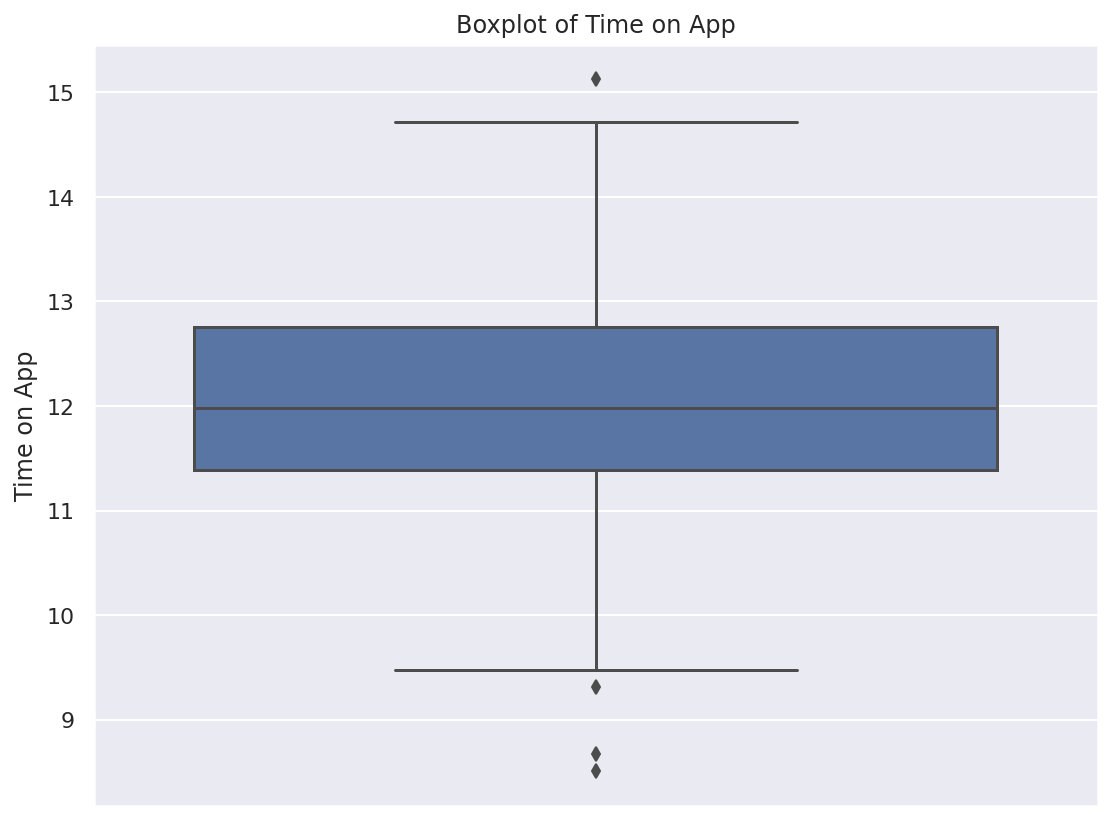

In [15]:
sns.set(rc={'figure.figsize':(9,7)})
sns.boxplot(y='Time on App', data=df).set(title='Boxplot of Time on App');

## Time on Website

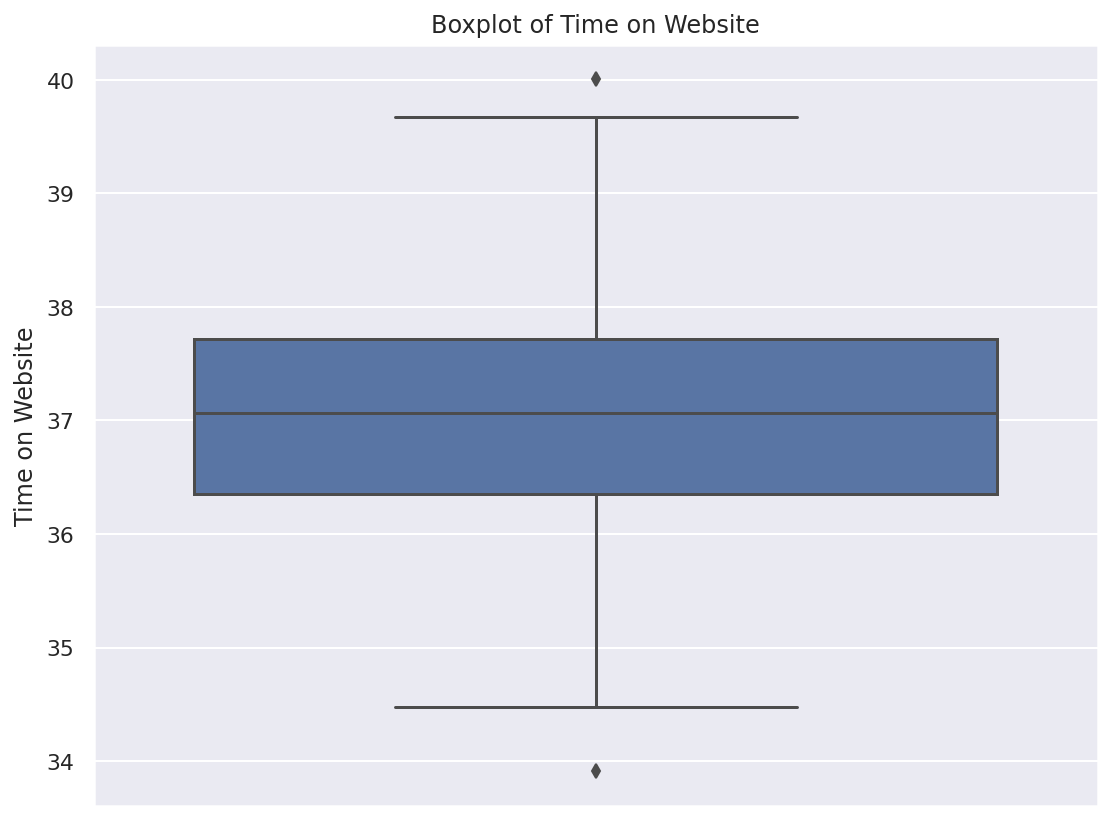

In [16]:
sns.set(rc={'figure.figsize':(9,7)})
sns.boxplot(y='Time on Website', data=df).set(title='Boxplot of Time on Website');

## Length of Membership

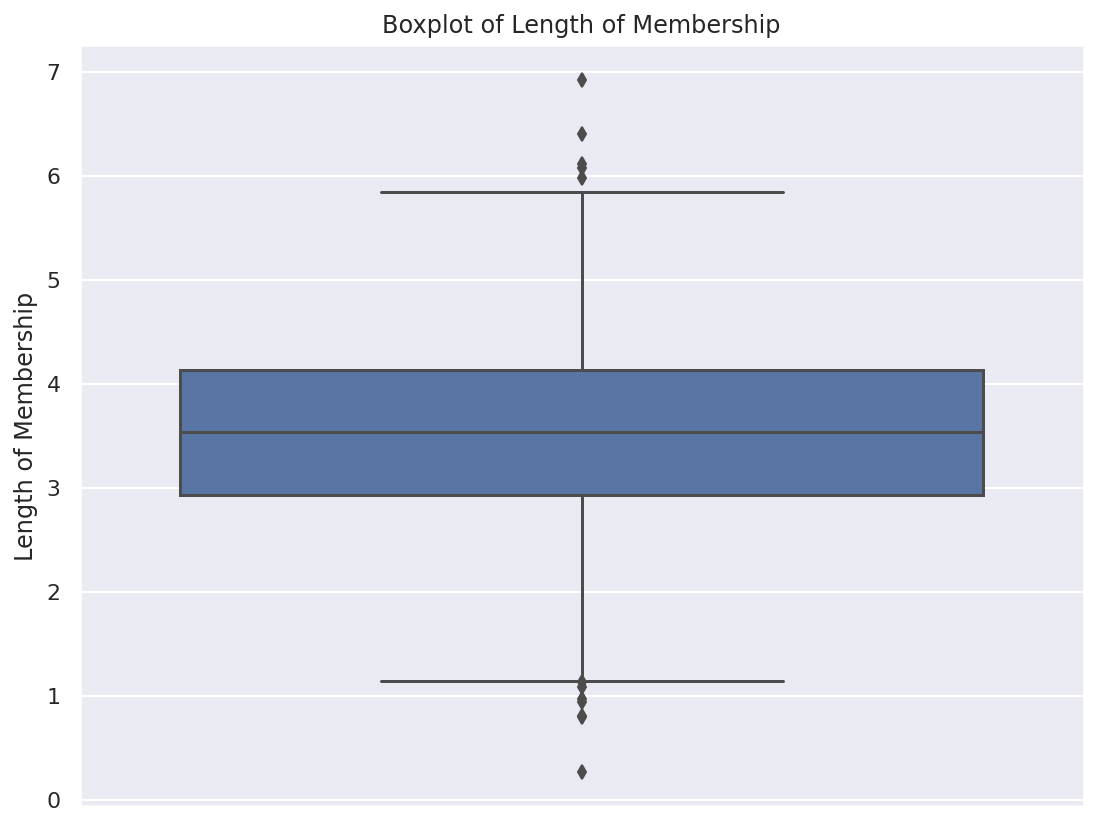

In [17]:
sns.set(rc={'figure.figsize':(9,7)})
sns.boxplot(y='Length of Membership', data=df).set(title='Boxplot of Length of Membership');

There are some outliers on every variables, but not in significant way, so we will keep them.

# Checking Multicollinearity

In [18]:
# Set X variables to be tested
X_variables = df[['Avg. Session Length','Time on App','Time on Website', 'Length of Membership']]

# Calculating VIF for each feature
X = add_constant(X_variables)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

const                   2657.483692
Avg. Session Length        1.005422
Time on App                1.008684
Time on Website            1.010275
Length of Membership       1.006949
dtype: float64

As expected before, the VIF of every predictor variables is low (under 5), therefore we may conclude that there is no multicollinearity among them.

# Set Up Target and Predictor Variables

In [19]:
X = df[['Avg. Session Length','Time on App','Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

# Data Splitting


We will going to split our dataframe (`df`) into training and testing. We will split the dataframe with the composition 70% training data and 30% testing data.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Modelling by LM (sklearn)

In [21]:
#define lm model
lm = LinearRegression()

#fit data to model
lm.fit(X_train,y_train)

LinearRegression()

In [22]:
# print the intercept
print(lm.intercept_)

-1054.2154761744268


In [23]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Session Length,25.362665
Time on App,38.823679
Time on Website,0.803568
Length of Membership,61.549053


**Interpretation of Coefficients:**

- Positive weight: when a feature increases, then the `Yearly Amount Spent` variable also increases
- Negative weight: when a feature increases, then the `Yearly Amount Spent` variable will decreases

## Prediction

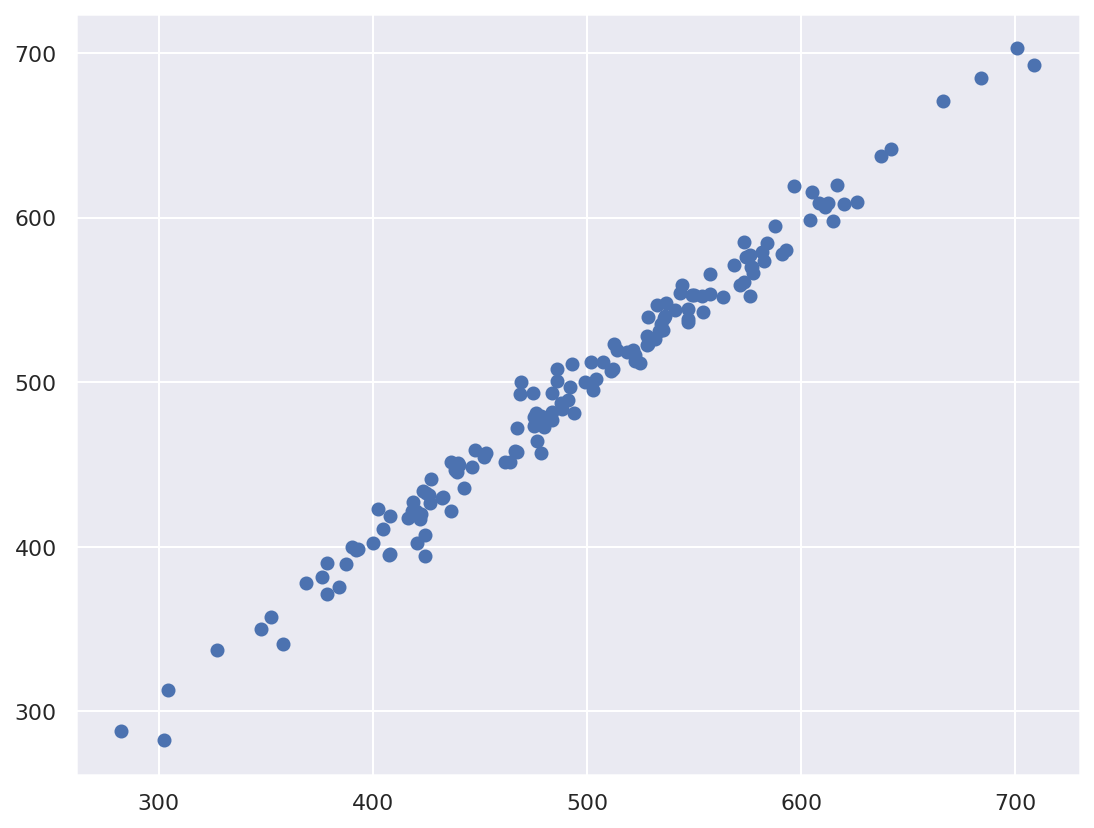

In [24]:
#Set the Prediction to Test Data
y_pred = lm.predict(X_test)

#Plot The Prediction Result
plt.scatter(y_test,y_pred)

The prediction results seem promising, showed by the strong correlation between prediction result and the test data.

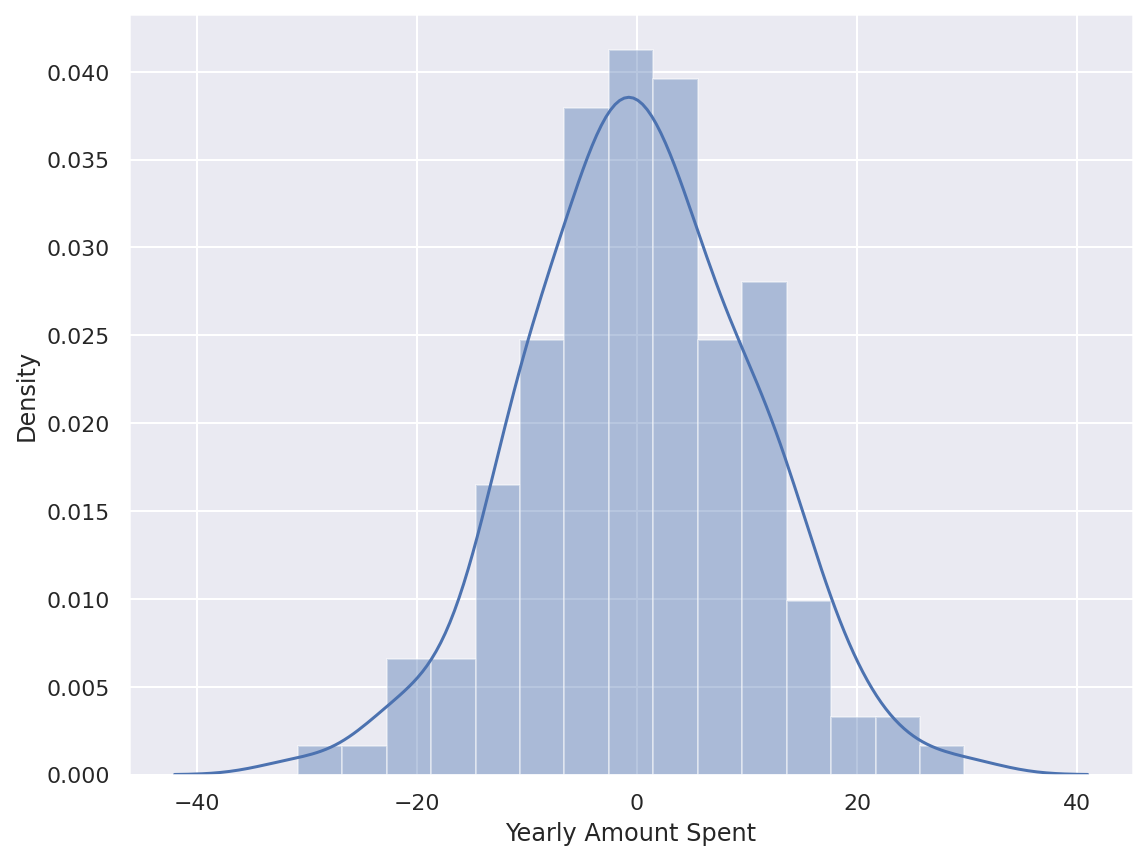

In [25]:
#Plot the Residuals
sns.distplot((y_test-y_pred),bins=15);

The residuals showing normal distribution, the linear model works good.

## Error Evaluation

In [26]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))

#Ratio
rm=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
sd=df['Yearly Amount Spent'].std()
print('RMSE to SD Ratio:', rm/sd)

#Rsquared
print('Rsquared:', r2_score(y_test, y_pred))

MAE: 7.988079194245083
MSE: 102.72313941866004
RMSE: 10.135242444986703
MAPE: 0.016840036798921123
RMSE to SD Ratio: 0.12778503889133103
Rsquared: 0.9845789607829495


The results from error evaluation looks promising, especially on the Rsquared value, indicating all of the preidctor variables able to explain 98% of the target variable.

# Modelling by OLS (statsmodel)

Next, we will try to use `ols` from `statsmodel` package to predict the `Yearly Amount Spent`. 

## Train Data

In [27]:
x1 = sm.add_constant(X_train)
results = sm.OLS(y_train,x1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.984
Model:                             OLS   Adj. R-squared:                  0.984
Method:                  Least Squares   F-statistic:                     5337.
Date:                 Fri, 29 Apr 2022   Prob (F-statistic):          9.84e-309
Time:                         14:19:41   Log-Likelihood:                -1297.4
No. Observations:                  350   AIC:                             2605.
Df Residuals:                      345   BIC:                             2624.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1054.2155     27.482    -38.361      0.000   -1108.268   -1000.163
Avg. Session Length     25.3627      0.526     48.263      0.000      24.329      26.396
Time on App             38.8237      0.538     72.168      0.000      37.766      39.882
Time on Website          0.8036      0.530      1.517      0.130      -0.238       1.845
Length of Membership    61.5491      0.549    112.188      0.000      60.470      62.628
==============================================================================
Omnibus:                        0.153   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.926   Jarque-Bera (JB):                0.071
Skew:                          -0.031   Prob(JB):                        0.965
Kurtosis:                       3.031   Cond. No.                     2.65e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

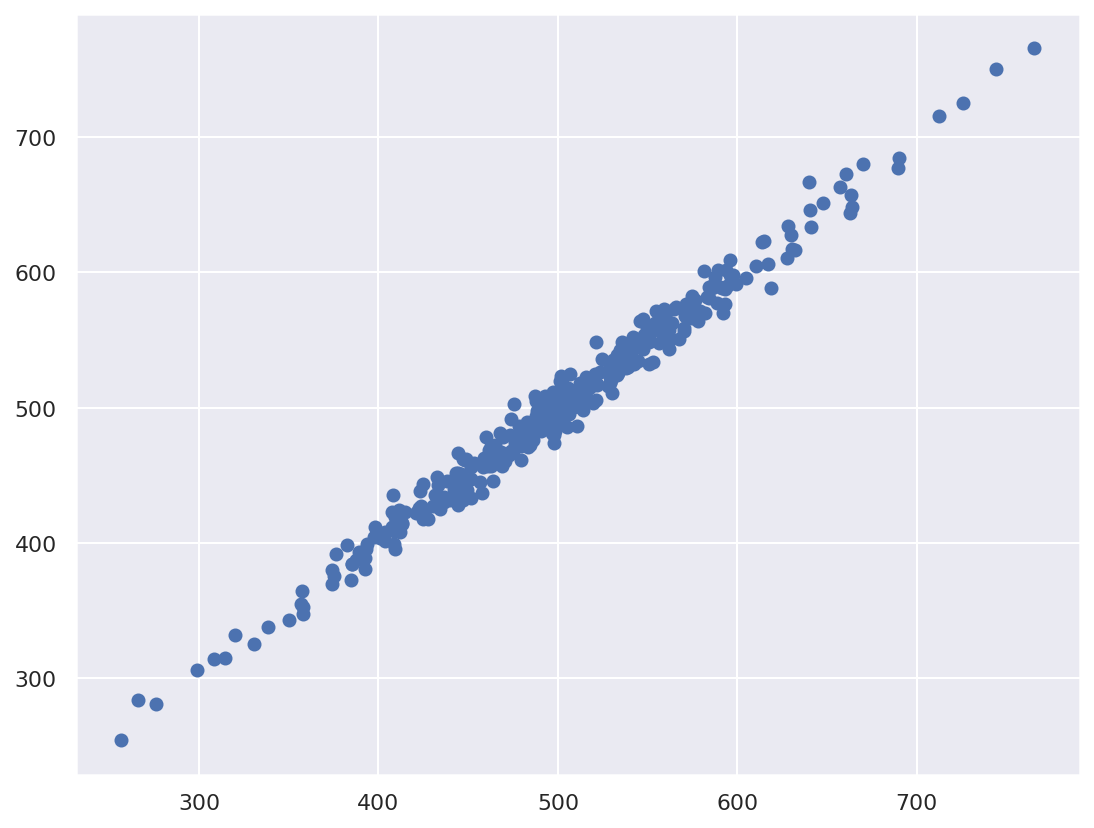

In [28]:
#Set the Prediction to Test Data
y_pred_ols = results.predict(x1)

#Plot The Prediction Result
plt.scatter(y_train, y_pred_ols)

In [105]:
x1['Ytrain']=y_train
x1['Ypred']=y_pred_ols
print(x1)

     const  Avg. Session Length  Time on App  Time on Website  \
211    1.0            34.081646    12.104542        36.059646   
52     1.0            34.187775    10.320116        37.453405   
178    1.0            32.635878    12.178573        35.674256   
336    1.0            32.302553    11.979061        38.269061   
201    1.0            34.007212    12.494323        36.045459   
..     ...                  ...          ...              ...   
98     1.0            32.288667    12.020112        39.074400   
476    1.0            34.336677    11.246813        38.682584   
322    1.0            33.264632    10.732131        36.145792   
382    1.0            33.587373     9.953995        37.345739   
365    1.0            32.030550    12.644202        38.001827   

     Length of Membership      Ytrain       Ypred  
211              3.974522  548.518529  553.733240  
52               2.094892  384.626572  372.577442  
178              4.131755  537.773163  529.306676  
336        

(350, 7)

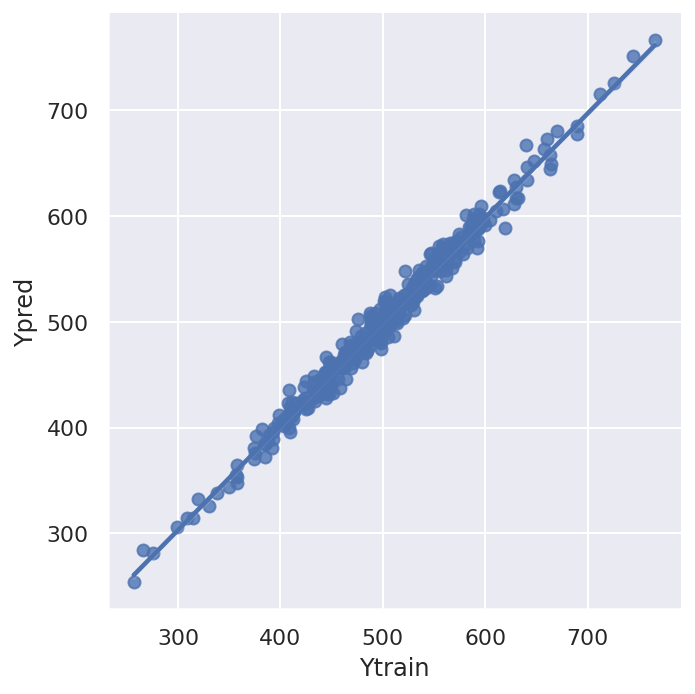

In [106]:
sns.lmplot(x='Ytrain',y='Ypred',data=x1)

The plot from prediction of Train Data seems good, because showing strong correlation.

## Test Data

In [108]:
x2=sm.add_constant(X_test)
results2 = sm.OLS(y_test,x2).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.985
Model:                             OLS   Adj. R-squared:                  0.985
Method:                  Least Squares   F-statistic:                     2404.
Date:                 Fri, 29 Apr 2022   Prob (F-statistic):          2.09e-131
Time:                         01:10:49   Log-Likelihood:                -557.44
No. Observations:                  150   AIC:                             1125.
Df Residuals:                      145   BIC:                             1140.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1052.0214     42.393    -24.816      0.000   -1135.809    -968.233
Avg. Session Length     26.8567      0.887     30.275      0.000      25.103      28.610
Time on App             38.4763      0.834     46.118      0.000      36.827      40.125
Time on Website         -0.4754      0.824     -0.577      0.565      -2.104       1.153
Length of Membership    61.5368      0.787     78.173      0.000      59.981      63.093
==============================================================================
Omnibus:                        1.037   Durbin-Watson:                   2.230
Prob(Omnibus):                  0.595   Jarque-Bera (JB):                0.644
Skew:                          -0.021   Prob(JB):                        0.725
Kurtosis:                       3.318   Cond. No.                     2.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

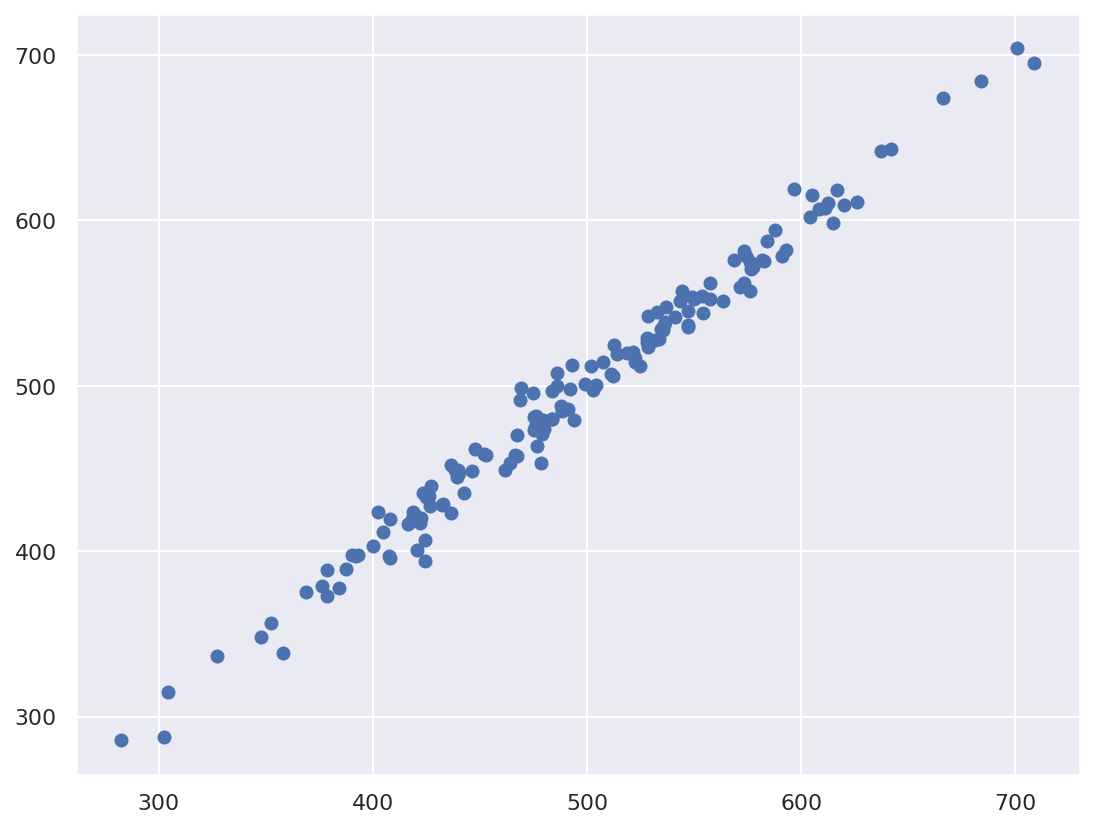

In [109]:
#Set the Prediction to Test Data
y_pred_ols1 = results2.predict(x2)

#Plot The Prediction Result
plt.scatter(y_test, y_pred_ols1)

In [110]:
x2['Ytest']=y_test
x2['Ypred']=y_pred_ols1
print(x2)

     const  Avg. Session Length  Time on App  Time on Website  \
229    1.0            33.946241    10.983977        37.951489   
337    1.0            31.827979    12.461147        37.428997   
327    1.0            31.128090    13.278956        37.387181   
416    1.0            33.454302    11.016756        37.637311   
306    1.0            31.912076    11.792972        36.257819   
..     ...                  ...          ...              ...   
410    1.0            33.265444    13.052210        38.775665   
91     1.0            33.616019    13.516284        36.773123   
376    1.0            32.397422    12.055340        37.685465   
479    1.0            34.606242    11.761884        38.126520   
466    1.0            34.211461    10.770249        34.649800   

     Length of Membership       Ytest       Ypred  
229              3.050713  436.283498  451.970875  
337              2.974737  440.002748  447.490518  
327              4.626075  557.252687  561.797971  
416        

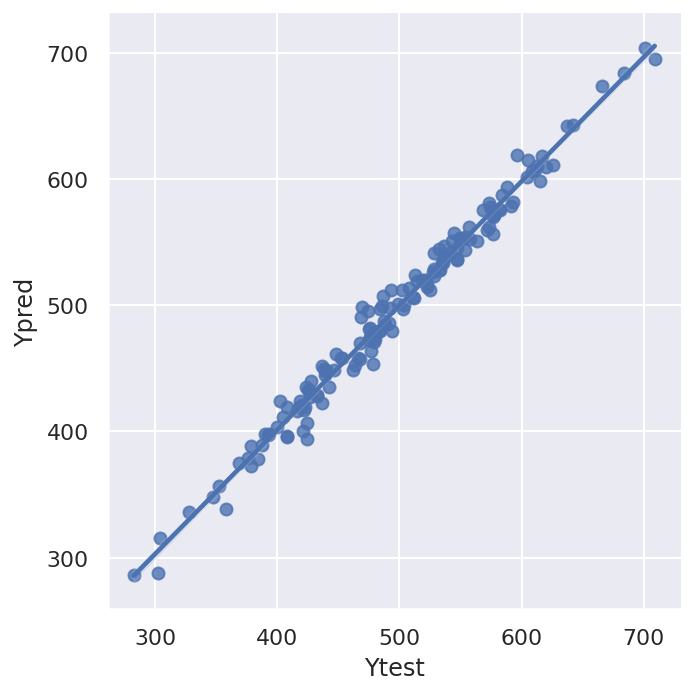

In [111]:
sns.lmplot(x='Ytest',y='Ypred',data=x2)

Similar like the Train Data, the prediction result of Test Data also showing a strong correlation, which indicates a very good prediction.

## Error Evaluation

In [112]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_ols1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_ols1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ols1)))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred_ols1))

#Ratio
rm=np.sqrt(metrics.mean_squared_error(y_test, y_pred_ols1))
sd=df['Yearly Amount Spent'].std()
print('RMSE to SD Ratio:', rm/sd)

#Rsquared
print('Rsquared:', r2_score(y_test, y_pred_ols1))

MAE: 7.814241842074117
MSE: 98.95153026004742
RMSE: 9.94743837679065
MAPE: 0.016438586125578046
RMSE to SD Ratio: 0.12541720701275041
Rsquared: 0.9851451636178269


The Error Evaluation are showing similar results with the linear regression by sklearn package. From the Rsquared value, we can conclude that the predictive variables used in OLS model are able to explain 98.5% the `Yearly Amount Spent` variable.

# Conclusion

Multiple Linear Regression is a very good model to use in this e-Commerce study case. The model is perfectly fit to predicting `Yearly Amount Spent` by e-Commerce Customers, mainly because of these reason:
- All variables are following normal distribution, no need to transform them.
- There are not so many outliers which can makes noise in the data.
- There is no multicollinearity issue found amoung predictors.